# Predicting Student Dropout and Academic Success

**Team Members:**
- Dariel Johnuel Carrion (dcarrion6@gatech.edu)
- Raul Rosado (rrosado6@gatech.edu)

---

## Project Overview

The goal of this project is to explore bias mitigation techniques in machine learning within the education domain. We will train models on a dataset related to student performance, apply bias mitigation strategies, and evaluate the effectiveness using fairness metrics.

---

## Dataset Selection

### Dataset Information

- **Dataset Name**: Predict Students Dropout and Academic Success
- **Regulated Domain**: Education
- **Number of Observations**: 4,425 rows (including column names)
- **Number of Variables**: 37 columns

### Dependent Variables

1. **Dropout Status**: Indicates whether a student dropped out of the program (unfavorable outcome).
2. **Academic Success**: Measures success, such as grades or graduation status (favorable or unfavorable outcomes).

### Protected Class Variables

1. **Marital Status**: A legally recognized protected class related to marital status.
2. **Daytime/Evening Attendance**: Indicates socioeconomic factors, implying work or family commitments.

### Legal Precedence/Law Covering Each Protected Class

- **Marital Status**: Protected under anti-discrimination laws that prevent discrimination based on marital status (e.g., Civil Rights Act).
- **Socioeconomic Factors (Daytime/Evening Attendance)**: Associated with indirect discrimination under laws protecting against socioeconomic discrimination.

---

## Step 1: Dataset Setup

### 1.1 Import Necessary Libraries




In [34]:
# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure matplotlib inline display
%matplotlib inline

# Import AIF360 libraries for fairness metrics and bias mitigation
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
from aif360.algorithms.preprocessing import Reweighing

# Import scikit-learn libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


### 1.2 Load the Dataset

Note: Ensure the first row is the header containing column names, and the subsequent rows are the data.

In [35]:
# Load the dataset
df = pd.read_csv('Data - Predict Students Dropout and Academic Success.csv')


### 1.3 Preview the Dataset

In [36]:
# Display the first few rows
df.head()


,Marital status,Application mode,Application order,Course,Daytime/EveningAttendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [37]:
# Check data types
print(df.dtypes)

# Get basic statistics
df.describe()


Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/EveningAttendance                           int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

,Marital status,Application mode,Application order,Course,Daytime/EveningAttendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


## Step 2: Exploratory Data Analysis
### 2.1 Identify Protected Class Subgroups

In [38]:
# Unique values in Marital Status
print("Marital Status Categories:")
print(df['Marital status'].unique())

# Unique values in Daytime/Evening Attendance
print("\nDaytime/Evening Attendance Categories:")
print(df['Daytime/EveningAttendance'].unique())


Marital Status Categories:
[1 2 4 3 5 6]

Daytime/Evening Attendance Categories:
[1 0]


### 2.2 Discretize Subgroups

In [39]:
# Mapping for Marital Status
marital_status_mapping = {
    1: 'Single',
    2: 'Married',
    3: 'Widower',
    4: 'Divorced',
    5: 'Facto Union',
    6: 'Legally Separated'
}

# Mapping for Daytime/Evening Attendance
attendance_mapping = {
    1: 'Daytime',
    0: 'Evening'
}

# Apply mappings
df['Marital status'] = df['Marital status'].map(marital_status_mapping)
df['Daytime/EveningAttendance'] = df['Daytime/EveningAttendance'].map(attendance_mapping)


### 2.3 Derive the 'Academic Success' Dependent Variable
#### 2.3.1 Calculate Average Grade

In [40]:
# Convert grade columns to numeric
df['Curricular units 1st sem (grade)'] = pd.to_numeric(df['Curricular units 1st sem (grade)'], errors='coerce')
df['Curricular units 2nd sem (grade)'] = pd.to_numeric(df['Curricular units 2nd sem (grade)'], errors='coerce')

# Replace zeros with NaN
df['Curricular units 1st sem (grade)'].replace(0, np.nan, inplace=True)
df['Curricular units 2nd sem (grade)'].replace(0, np.nan, inplace=True)

# Calculate average grade
df['Average Grade'] = df[['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']].mean(axis=1)


#### 2.3.2 Define Academic Success

In [41]:
# Define threshold for academic success
grade_threshold = 12.0  # On a scale of 0-20

# Create 'Academic Success' column
df['Academic Success'] = np.where(df['Average Grade'] >= grade_threshold, 1, 0)


### 2.4 Create Frequency Tables
#### 2.4.1 Marital Status vs. Academic Success

In [42]:
marital_academic_counts = pd.crosstab(df['Marital status'], df['Academic Success'])
print("\nFrequency Table: Marital Status vs. Academic Success")
print(marital_academic_counts)



Frequency Table: Marital Status vs. Academic Success
Academic Success      0     1
Marital status               
Divorced             58    33
Facto Union          13    12
Legally Separated     5     1
Married             191   188
Single             1557  2362
Widower               3     1


#### 2.4.2 Daytime/Evening Attendance vs. Academic Success

In [43]:
attendance_academic_counts = pd.crosstab(df['Daytime/EveningAttendance'], df['Academic Success'])

print(attendance_academic_counts)
print("\nFrequency Table: Daytime/Evening Attendance vs. Academic Success")

Academic Success              0     1
Daytime/EveningAttendance            
Daytime                    1549  2392
Evening                     278   205

Frequency Table: Daytime/Evening Attendance vs. Academic Success


### 2.5 Generate Bar Charts
#### 2.5.1 Marital Status vs. Academic Success

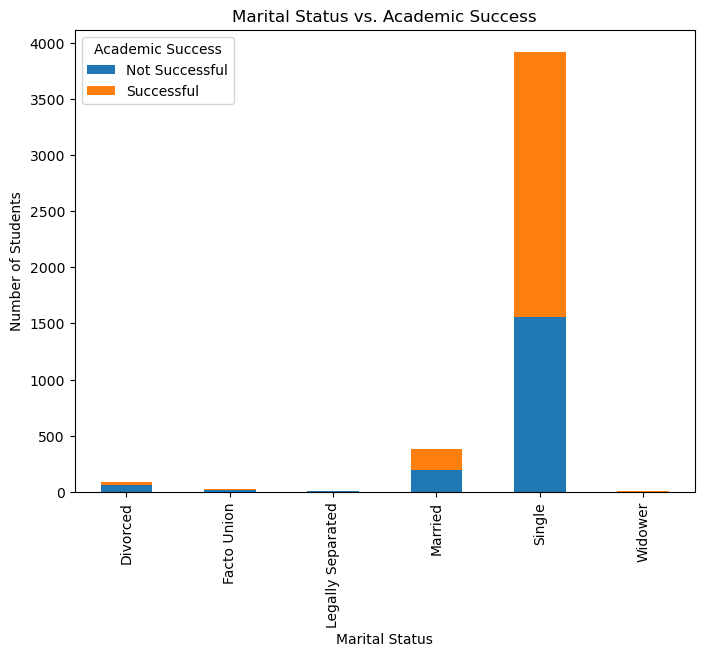

In [44]:
# Plotting Marital Status vs. Academic Success
marital_academic_counts.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title('Marital Status vs. Academic Success')
plt.xlabel('Marital Status')
plt.ylabel('Number of Students')
plt.legend(title='Academic Success', labels=['Not Successful', 'Successful'])
plt.show()


#### 2.5.2 Daytime/Evening Attendance vs. Academic Success

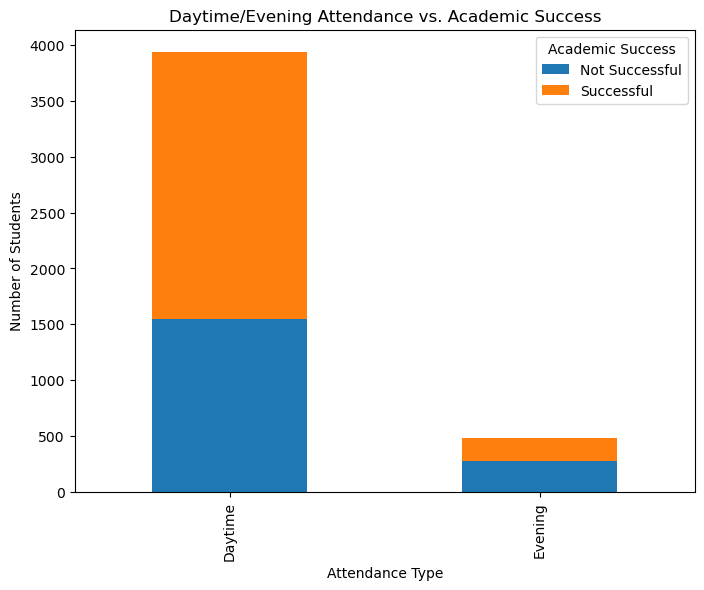

In [45]:
# Plotting Daytime/Evening Attendance vs. Academic Success
attendance_academic_counts.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title('Daytime/Evening Attendance vs. Academic Success')
plt.xlabel('Attendance Type')
plt.ylabel('Number of Students')
plt.legend(title='Academic Success', labels=['Not Successful', 'Successful'])
plt.show()


## Step 3: Fairness Metrics and Bias Mitigation
### 3.1 Identify Privileged and Unprivileged Groups
- Marital Status
  - Privileged Group: Married (Marital status = 1)
  - Unprivileged Group: Not Married (Marital status = 0)
- Daytime/Evening Attendance
  - Privileged Group: Daytime (Daytime/EveningAttendance = 1)
  - Unprivileged Group: Evening (Daytime/EveningAttendance = 0)

### 3.2 Select Fairness Metrics
We will use:

- Statistical Parity Difference
- Disparate Impact

### 3.3 Prepare the Dataset for AIF360
#### 3.3.1 Encode Categorical Variables

In [46]:
# Encode 'Marital status' and 'Daytime/EveningAttendance' already done

# Encode 'Target' for Dropout Status
df['Dropout Status'] = df['Target'].map({
    'Graduate': 0,  # Favorable outcome
    'Enrolled': 1,  # Unfavorable outcome
    'Dropout': 1    # Unfavorable outcome
})


#### 3.3.2 Handle Missing Value

In [47]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)



Missing values in each column:
Marital status                                      0
Application mode                                    0
Application order                                   0
Course                                              0
Daytime/EveningAttendance                           0
Previous qualification                              0
Previous qualification (grade)                      0
Nacionality                                         0
Mother's qualification                              0
Father's qualification                              0
Mother's occupation                                 0
Father's occupation                                 0
Admission grade                                     0
Displaced                                           0
Educational special needs                           0
Debtor                                              0
Tuition fees up to date                             0
Gender                                            

#### 3.3.3 Define Features and Labels
For Dropout Status:

In [48]:
# Features for Dropout Status
features_dropout = df.drop(columns=['Target', 'Dropout Status', 'Academic Success', 'Average Grade'])

# Label for Dropout Status
label_dropout = df['Dropout Status']


For Academic Success:

In [49]:
# Features for Academic Success
features_academic = features_dropout.copy()

# Label for Academic Success
label_academic = df['Academic Success']


#### 3.3.4 Encode Categorical Variables for Modeling
Before creating the BinaryLabelDataset, we need to ensure that all categorical variables (including the protected attributes and any other categorical features) are encoded numerically. This is crucial because the BinaryLabelDataset requires all data to be numerical.

In [50]:

# Re-encode 'Marital status' to numerical values (binary encoding)
df['Marital status'] = df['Marital status'].map({
    'Married': 1,
    'Single': 0,
    'Widower': 0,
    'Divorced': 0,
    'Facto Union': 0,
    'Legally Separated': 0
})


# Re-encode 'Daytime/EveningAttendance' to numerical values
df['Daytime/EveningAttendance'] = df['Daytime/EveningAttendance'].map({
    'Daytime': 1,
    'Evening': 0
})


In [51]:
# Encode other categorical variables using LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['Gender', 'Nacionality', 'Course', 'Application mode',
                       "Mother's qualification", "Father's qualification",
                       "Mother's occupation", "Father's occupation"]

# Apply LabelEncoder to each column
for col in categorical_columns:
    df[col] = le.fit_transform(df[col].astype(str))


In [52]:
# Verify all columns are numerical
print("\nData types after encoding:")
print(df.dtypes)



Data types after encoding:
Marital status                                      int64
Application mode                                    int32
Application order                                   int64
Course                                              int32
Daytime/EveningAttendance                           int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int32
Mother's qualification                              int32
Father's qualification                              int32
Mother's occupation                                 int32
Father's occupation                                 int32
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                     

#### 3.3.5 Create the BinaryLabelDataset
With all columns now numerical, we can proceed to create the BinaryLabelDataset:

For Dropout Status:

In [53]:
# Define the features and label for Dropout Status
features_dropout = df.drop(columns=['Target', 'Dropout Status', 'Academic Success', 'Average Grade'])

label_dropout = df['Dropout Status']

# Create BinaryLabelDataset for Dropout Status
dataset_dropout = BinaryLabelDataset(
    favorable_label=0,  # Not Dropped Out
    unfavorable_label=1,  # Dropped Out
    df=pd.concat([features_dropout, label_dropout], axis=1),
    label_names=['Dropout Status'],
    protected_attribute_names=['Marital status', 'Daytime/EveningAttendance']
)


For Academic Success:

In [54]:

# For Academic Success
# Define the features and label for Academic Success
features_academic = features_dropout.copy()  # Features are the same
label_academic = df['Academic Success']

# Create BinaryLabelDataset for Academic Success
dataset_academic = BinaryLabelDataset(
    favorable_label=1,  # Academically Successful
    unfavorable_label=0,  # Not Academically Successful
    df=pd.concat([features_academic, label_academic], axis=1),
    label_names=['Academic Success'],
    protected_attribute_names=['Marital status', 'Daytime/EveningAttendance']
)

### 3.4 Compute Fairness Metrics on Original Dataset
#### 3.4.1 Marital Status and Dropout Status

In [55]:
metric_orig_marital_dropout = BinaryLabelDatasetMetric(
    dataset_dropout,
    unprivileged_groups=[{'Marital status': 0}],
    privileged_groups=[{'Marital status': 1}]
)

spd_marital_dropout = metric_orig_marital_dropout.statistical_parity_difference()
di_marital_dropout = metric_orig_marital_dropout.disparate_impact()

print(f"\nMarital Status & Dropout Status - SPD: {spd_marital_dropout}")
print(f"Marital Status & Dropout Status - DI: {di_marital_dropout}")



Marital Status & Dropout Status - SPD: 0.08501399251656183
Marital Status & Dropout Status - DI: 1.1607747613578516


#### 3.4.2 Marital Status and Academic Success

In [56]:
metric_orig_marital_academic = BinaryLabelDatasetMetric(
    dataset_academic,
    unprivileged_groups=[{'Marital status': 0}],
    privileged_groups=[{'Marital status': 1}]
)

spd_marital_academic = metric_orig_marital_academic.statistical_parity_difference()
di_marital_academic = metric_orig_marital_academic.disparate_impact()

print(f"\nMarital Status & Academic Success - SPD: {spd_marital_academic}")
print(f"Marital Status & Academic Success - DI: {di_marital_academic}")



Marital Status & Academic Success - SPD: 0.08119218910585824
Marital Status & Academic Success - DI: 1.1282467532467533


#### 3.4.3 Daytime/Evening Attendance and Dropout Status

In [57]:
metric_orig_attendance_dropout = BinaryLabelDatasetMetric(
    dataset_dropout,
    unprivileged_groups=[{'Daytime/EveningAttendance': 0}],
    privileged_groups=[{'Daytime/EveningAttendance': 1}]
)

spd_attendance_dropout = metric_orig_attendance_dropout.statistical_parity_difference()
di_attendance_dropout = metric_orig_attendance_dropout.disparate_impact()

print(f"\nAttendance & Dropout Status - SPD: {spd_attendance_dropout}")
print(f"Attendance & Dropout Status - DI: {di_attendance_dropout}")



Attendance & Dropout Status - SPD: -0.06291532270350975
Attendance & Dropout Status - DI: 0.8974652923107482


#### 3.4.4 Daytime/Evening Attendance and Academic Success

In [58]:
metric_orig_attendance_academic = BinaryLabelDatasetMetric(
    dataset_academic,
    unprivileged_groups=[{'Daytime/EveningAttendance': 0}],
    privileged_groups=[{'Daytime/EveningAttendance': 1}]
)

spd_attendance_academic = metric_orig_attendance_academic.statistical_parity_difference()
di_attendance_academic = metric_orig_attendance_academic.disparate_impact()

print(f"\nAttendance & Academic Success - SPD: {spd_attendance_academic}")
print(f"Attendance & Academic Success - DI: {di_attendance_academic}")



Attendance & Academic Success - SPD: -0.1845758735216405
Attendance & Academic Success - DI: 0.746127502634352


### 3.5 Apply Bias Mitigation Algorithm
We will use the Reweighing algorithm.

#### 3.5.1 Marital Status and Dropout Status

In [59]:
RW_marital_dropout = Reweighing(
    unprivileged_groups=[{'Marital status': 0}],
    privileged_groups=[{'Marital status': 1}]
)

dataset_transf_marital_dropout = RW_marital_dropout.fit_transform(dataset_dropout)


#### 3.5.2 Marital Status and Academic Success

In [60]:
RW_marital_academic = Reweighing(
    unprivileged_groups=[{'Marital status': 0}],
    privileged_groups=[{'Marital status': 1}]
)

dataset_transf_marital_academic = RW_marital_academic.fit_transform(dataset_academic)


### 3.6 Compute Fairness Metrics on Transformed Dataset
#### 3.6.1 Marital Status and Dropout Status

In [61]:
metric_transf_marital_dropout = BinaryLabelDatasetMetric(
    dataset_transf_marital_dropout,
    unprivileged_groups=[{'Marital status': 0}],
    privileged_groups=[{'Marital status': 1}]
)

spd_marital_dropout_transf = metric_transf_marital_dropout.statistical_parity_difference()
di_marital_dropout_transf = metric_transf_marital_dropout.disparate_impact()

print(f"\nTransformed Marital Status & Dropout Status - SPD: {spd_marital_dropout_transf}")
print(f"Transformed Marital Status & Dropout Status - DI: {di_marital_dropout_transf}")



Transformed Marital Status & Dropout Status - SPD: 1.1102230246251565e-16
Transformed Marital Status & Dropout Status - DI: 1.0000000000000002


#### 3.6.2 Marital Status and Academic Success

In [62]:
metric_transf_marital_academic = BinaryLabelDatasetMetric(
    dataset_transf_marital_academic,
    unprivileged_groups=[{'Marital status': 0}],
    privileged_groups=[{'Marital status': 1}]
)

spd_marital_academic_transf = metric_transf_marital_academic.statistical_parity_difference()
di_marital_academic_transf = metric_transf_marital_academic.disparate_impact()

print(f"\nTransformed Marital Status & Academic Success - SPD: {spd_marital_academic_transf}")
print(f"Transformed Marital Status & Academic Success - DI: {di_marital_academic_transf}")



Transformed Marital Status & Academic Success - SPD: 0.0
Transformed Marital Status & Academic Success - DI: 1.0


### 3.7 Summarize Results

In [63]:
results = pd.DataFrame({
    'Metric': ['Statistical Parity Difference', 'Disparate Impact'],
    'Original Marital & Dropout': [spd_marital_dropout, di_marital_dropout],
    'Transformed Marital & Dropout': [spd_marital_dropout_transf, di_marital_dropout_transf],
    'Original Marital & Academic': [spd_marital_academic, di_marital_academic],
    'Transformed Marital & Academic': [spd_marital_academic_transf, di_marital_academic_transf]
})

print("\nFairness Metrics Before and After Mitigation:")
print(results)



Fairness Metrics Before and After Mitigation:
                          Metric  Original Marital & Dropout  \
0  Statistical Parity Difference                    0.085014   
1               Disparate Impact                    1.160775   

   Transformed Marital & Dropout  Original Marital & Academic  \
0                   1.110223e-16                     0.081192   
1                   1.000000e+00                     1.128247   

   Transformed Marital & Academic  
0                             0.0  
1                             1.0  


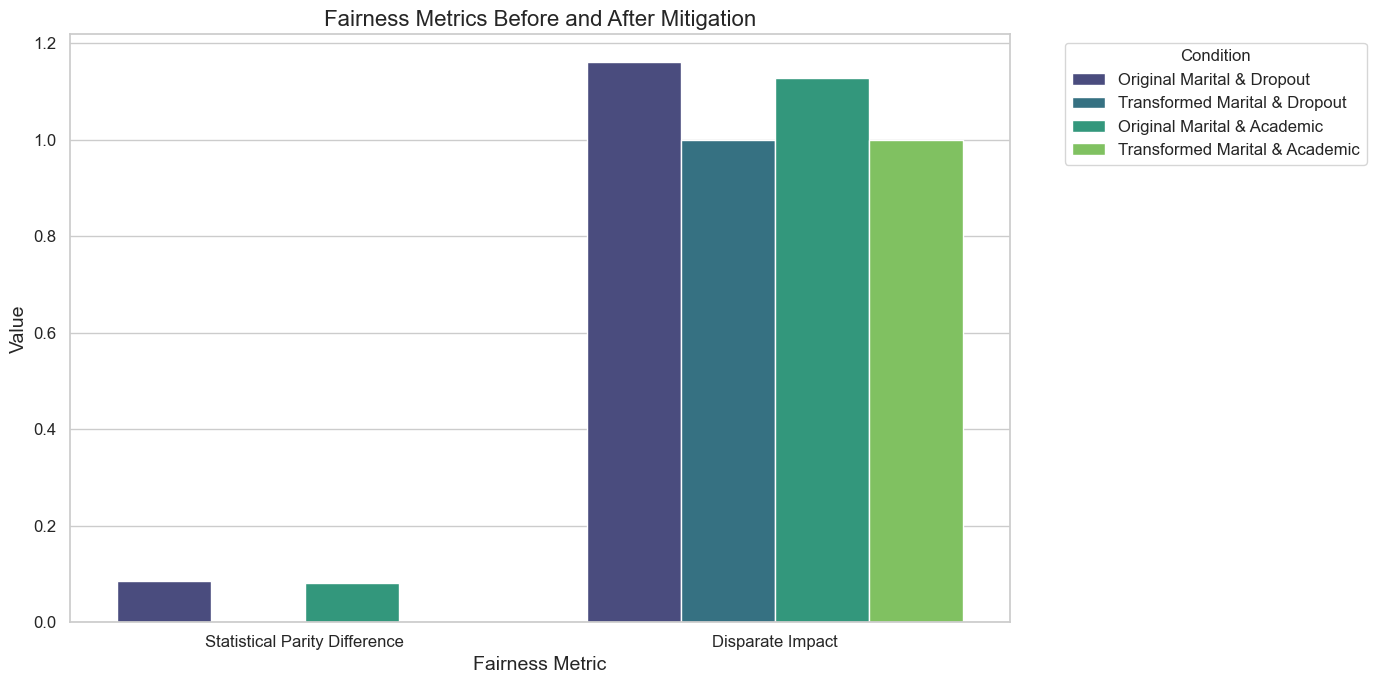

In [77]:

results_melted = results.melt(id_vars='Metric', var_name='Condition', value_name='Value')

# Create a grouped bar plot
plt.figure(figsize=(14, 7))
sns.barplot(x='Metric', y='Value', hue='Condition', data=results_melted, palette='viridis')
plt.title('Fairness Metrics Before and After Mitigation', fontsize=16)
plt.xlabel('Fairness Metric', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


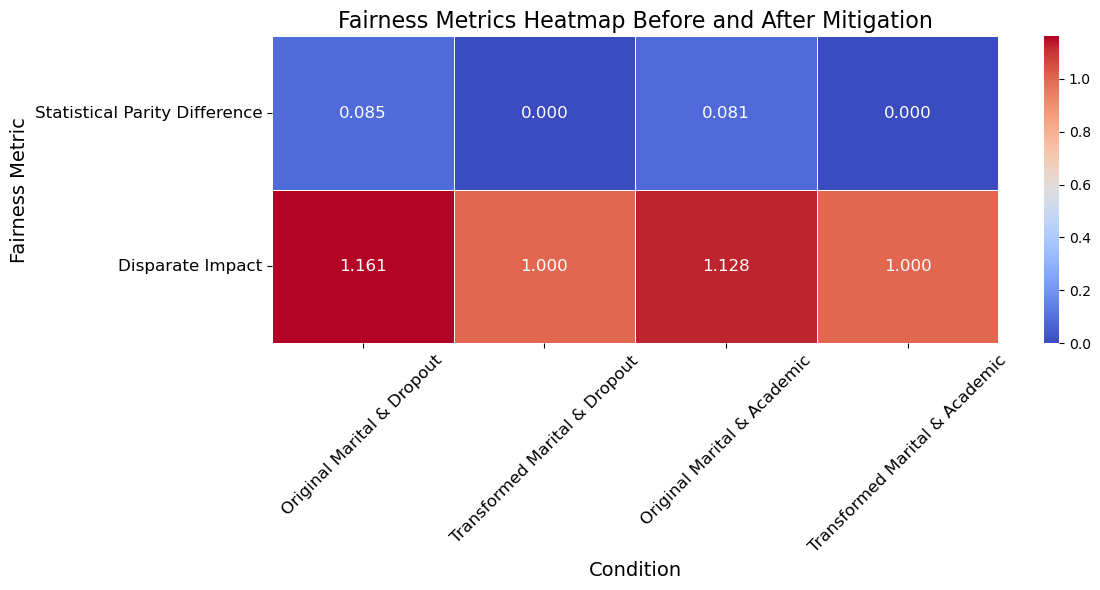

In [64]:
# Pivot the DataFrame for heatmap
heatmap_data = results.set_index('Metric')

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap='coolwarm', linewidths=.5, annot_kws={"size": 12})

plt.title('Fairness Metrics Heatmap Before and After Mitigation', fontsize=16)
plt.xlabel('Condition', fontsize=14)
plt.ylabel('Fairness Metric', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

## Step 4: Classification and Bias Mitigation
### 4.1 Train/Test Split

In [65]:
# For Dropout Status
X_dropout = features_dropout.values
y_dropout = label_dropout.values

# Split indices
train_indices, test_indices = train_test_split(
    np.arange(len(y_dropout)),
    test_size=0.3,
    random_state=42,
    stratify=y_dropout
)

# Original dataset
X_train_orig_dropout = X_dropout[train_indices]
y_train_orig_dropout = y_dropout[train_indices]
X_test_orig_dropout = X_dropout[test_indices]
y_test_orig_dropout = y_dropout[test_indices]

# Transformed dataset (Marital Status & Dropout)
weights_train_marital_dropout = dataset_transf_marital_dropout.instance_weights[train_indices]


### 4.2 Train a Classifier
#### 4.2.1 On Original Data

In [66]:
clf_orig_dropout = LogisticRegression(solver='liblinear')
clf_orig_dropout.fit(X_train_orig_dropout, y_train_orig_dropout)


LogisticRegression(solver='liblinear')

#### 4.2.2 On Transformed Data

In [67]:
clf_transf_marital_dropout = LogisticRegression(solver='liblinear')
clf_transf_marital_dropout.fit(X_train_orig_dropout, y_train_orig_dropout, sample_weight=weights_train_marital_dropout.ravel())


LogisticRegression(solver='liblinear')

### 4.3 Evaluate the Classifier
#### 4.3.1 Predictions

In [68]:
# Predictions on original test data
y_pred_orig_dropout = clf_orig_dropout.predict(X_test_orig_dropout)

# Predictions on transformed test data
y_pred_transf_marital_dropout = clf_transf_marital_dropout.predict(X_test_orig_dropout)


#### 4.3.2 Create BinaryLabelDataset for Predictions

In [69]:
# Original test dataset
dataset_test_orig_dropout = dataset_dropout.subset(test_indices)
dataset_test_orig_dropout_pred = dataset_test_orig_dropout.copy()
dataset_test_orig_dropout_pred.labels = y_pred_orig_dropout

# Transformed test dataset
dataset_test_transf_marital_dropout = dataset_transf_marital_dropout.subset(test_indices)
dataset_test_transf_marital_dropout_pred = dataset_test_transf_marital_dropout.copy()
dataset_test_transf_marital_dropout_pred.labels = y_pred_transf_marital_dropout


#### 4.3.3 Compute Fairness Metrics

In [70]:
metric_clf_orig_marital_dropout = ClassificationMetric(
    dataset_test_orig_dropout,
    dataset_test_orig_dropout_pred,
    unprivileged_groups=[{'Marital status': 0}],
    privileged_groups=[{'Marital status': 1}]
)

metric_clf_transf_marital_dropout = ClassificationMetric(
    dataset_test_transf_marital_dropout,
    dataset_test_transf_marital_dropout_pred,
    unprivileged_groups=[{'Marital status': 0}],
    privileged_groups=[{'Marital status': 1}]
)

spd_clf_orig_marital_dropout = metric_clf_orig_marital_dropout.statistical_parity_difference()
di_clf_orig_marital_dropout = metric_clf_orig_marital_dropout.disparate_impact()

spd_clf_transf_marital_dropout = metric_clf_transf_marital_dropout.statistical_parity_difference()
di_clf_transf_marital_dropout = metric_clf_transf_marital_dropout.disparate_impact()

print(f"\nClassifier on Original Data - SPD: {spd_clf_orig_marital_dropout}, DI: {di_clf_orig_marital_dropout}")
print(f"Classifier on Transformed Data - SPD: {spd_clf_transf_marital_dropout}, DI: {di_clf_transf_marital_dropout}")



Classifier on Original Data - SPD: 0.058687474245304405, DI: 1.0982377286280096
Classifier on Transformed Data - SPD: -0.006686675141587828, DI: 0.9898330133471374


### 4.4 Summarize and Compare Outcomes


Fairness Metrics After Classification:
                          Metric  Classifier on Original Data  \
0  Statistical Parity Difference                     0.058687   
1               Disparate Impact                     1.098238   

   Classifier on Transformed Data  
0                       -0.006687  
1                        0.989833  

Melted DataFrame:
                          Metric                       Condition     Value
0  Statistical Parity Difference     Classifier on Original Data  0.058687
1               Disparate Impact     Classifier on Original Data  1.098238
2  Statistical Parity Difference  Classifier on Transformed Data -0.006687
3               Disparate Impact  Classifier on Transformed Data  0.989833


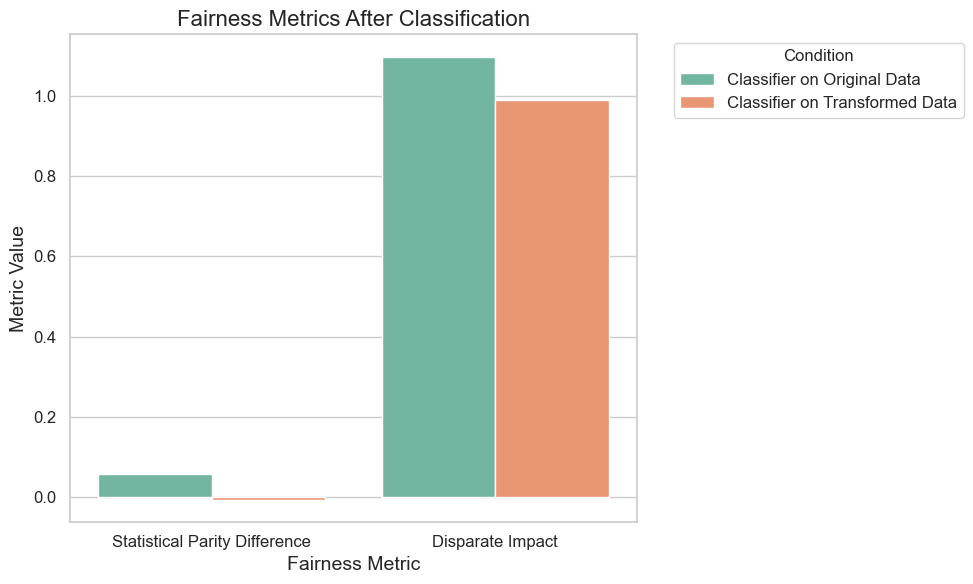

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame
results_clf = pd.DataFrame({
    'Metric': ['Statistical Parity Difference', 'Disparate Impact'],
    'Classifier on Original Data': [spd_clf_orig_marital_dropout, di_clf_orig_marital_dropout],
    'Classifier on Transformed Data': [spd_clf_transf_marital_dropout, di_clf_transf_marital_dropout]
})

print("\nFairness Metrics After Classification:")
print(results_clf)

# Melt the DataFrame to long format for seaborn
results_clf_melted = results_clf.melt(id_vars='Metric', 
                                      var_name='Condition', 
                                      value_name='Value')

print("\nMelted DataFrame:")
print(results_clf_melted)

# Set the plot style
sns.set(style="whitegrid")

# Create a grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Condition', data=results_clf_melted, palette='Set2')

plt.title('Fairness Metrics After Classification', fontsize=16)
plt.xlabel('Fairness Metric', fontsize=14)
plt.ylabel('Metric Value', fontsize=14)
plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


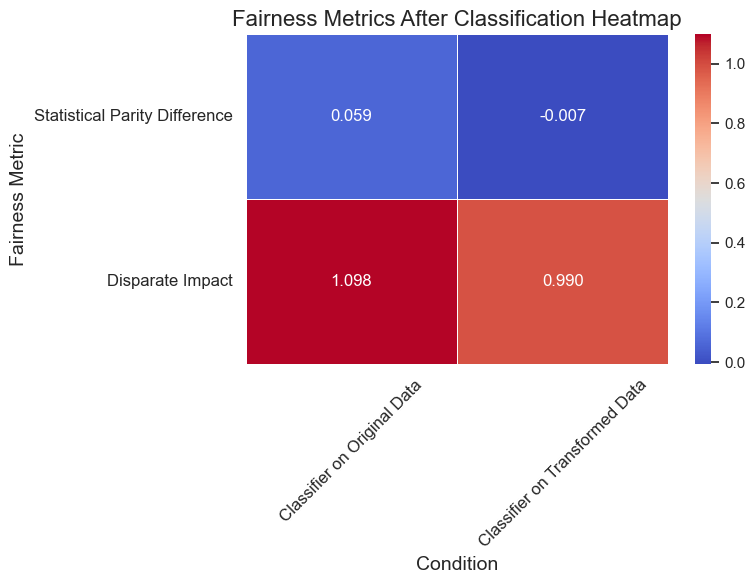

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame
results_clf = pd.DataFrame({
    'Metric': ['Statistical Parity Difference', 'Disparate Impact'],
    'Classifier on Original Data': [spd_clf_orig_marital_dropout, di_clf_orig_marital_dropout],
    'Classifier on Transformed Data': [spd_clf_transf_marital_dropout, di_clf_transf_marital_dropout]
})

# Pivot the DataFrame for heatmap
heatmap_data = results_clf.set_index('Metric')

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap='coolwarm', linewidths=.5, annot_kws={"size": 12})

plt.title('Fairness Metrics After Classification Heatmap', fontsize=16)
plt.xlabel('Condition', fontsize=14)
plt.ylabel('Fairness Metric', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()


## Step 5: Analysis and Reflections
### 5.1 Graphical Analysis
#### 5.1.1 Fairness Metrics Across Different Stages

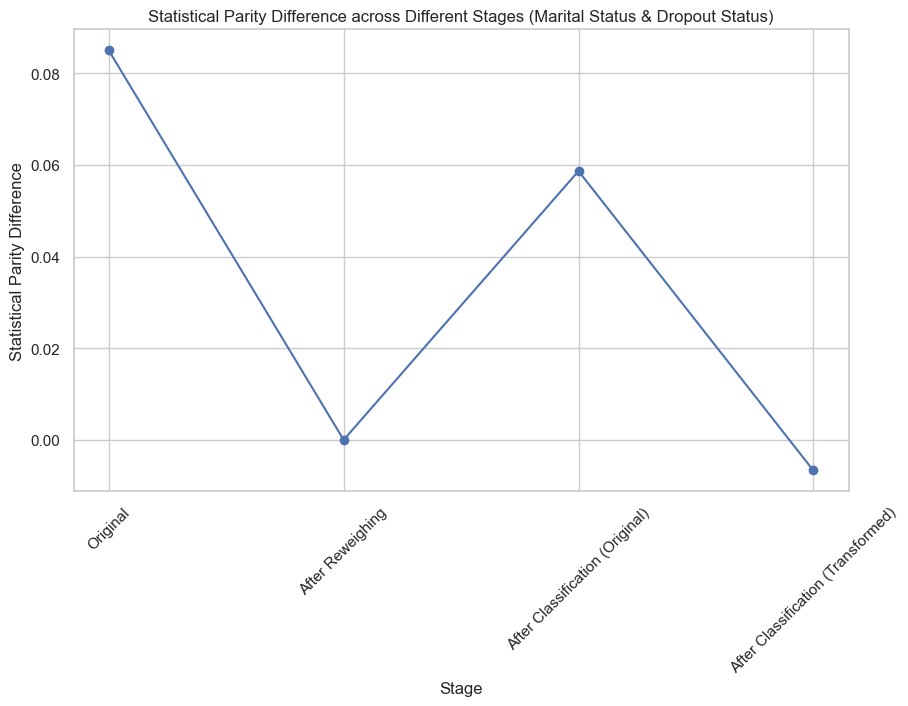

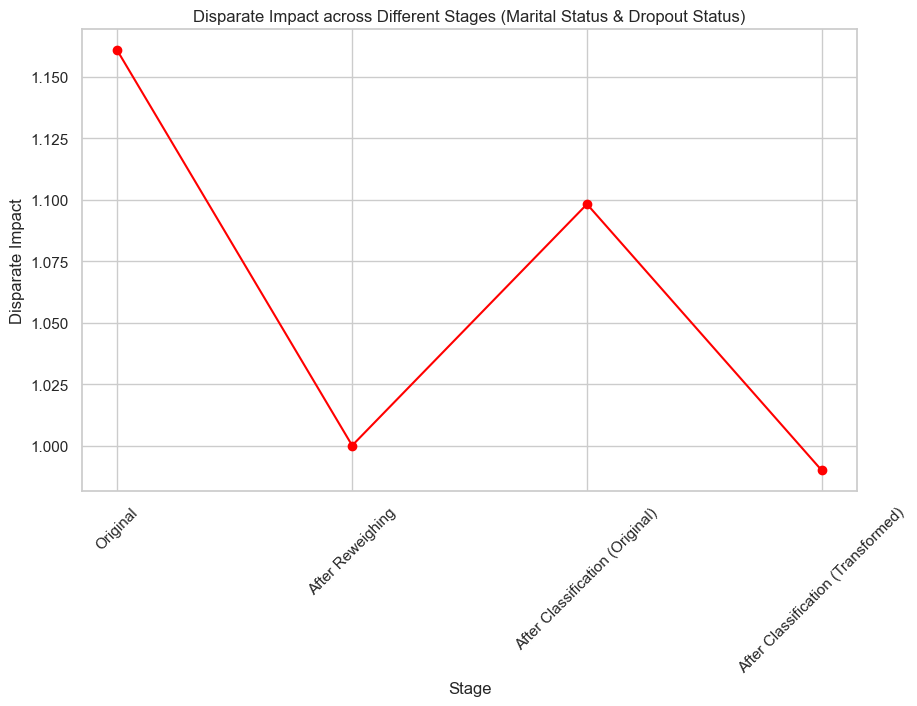

In [73]:
# Prepare data for plotting
metrics_marital_dropout = pd.DataFrame({
    'Stage': ['Original', 'After Reweighing', 'After Classification (Original)', 'After Classification (Transformed)'],
    'Statistical Parity Difference': [spd_marital_dropout, spd_marital_dropout_transf, spd_clf_orig_marital_dropout, spd_clf_transf_marital_dropout],
    'Disparate Impact': [di_marital_dropout, di_marital_dropout_transf, di_clf_orig_marital_dropout, di_clf_transf_marital_dropout]
})

# Plotting Statistical Parity Difference
plt.figure(figsize=(10,6))
plt.plot(metrics_marital_dropout['Stage'], metrics_marital_dropout['Statistical Parity Difference'], marker='o')
plt.title('Statistical Parity Difference across Different Stages (Marital Status & Dropout Status)')
plt.xlabel('Stage')
plt.ylabel('Statistical Parity Difference')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plotting Disparate Impact
plt.figure(figsize=(10,6))
plt.plot(metrics_marital_dropout['Stage'], metrics_marital_dropout['Disparate Impact'], marker='o', color='red')
plt.title('Disparate Impact across Different Stages (Marital Status & Dropout Status)')
plt.xlabel('Stage')
plt.ylabel('Disparate Impact')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### 5.2 Justify Fairness Metric Effectiveness

In this project, we used two fairness metrics—**Statistical Parity Difference (SPD)** and **Disparate Impact (DI)**—to evaluate and mitigate bias in predictions related to student dropout and academic success. Here’s why these metrics were effective for this analysis:

1. **Statistical Parity Difference (SPD)**:
   - **Purpose**: SPD measures the difference in favorable outcomes between privileged and unprivileged groups. An SPD close to zero indicates that both groups are equally likely to receive a positive outcome.
   - **Effectiveness**: SPD is effective in identifying direct disparities in outcome distributions across groups. For instance, in the original dataset, SPD helped reveal biases against unprivileged groups in dropout and success rates. After applying the Reweighing algorithm, SPD values moved closer to zero, indicating that the mitigation effectively balanced the probability of favorable outcomes across groups.
   - **Limitations**: Although SPD is useful in showing absolute differences, it does not account for the relative size of outcome differences, which can sometimes obscure proportional fairness, especially when group sizes differ.

2. **Disparate Impact (DI)**:
   - **Purpose**: DI provides a ratio-based comparison of favorable outcomes between privileged and unprivileged groups. A DI close to 1 suggests proportional fairness, where outcomes are distributed similarly across groups.
   - **Effectiveness**: DI is particularly valuable for assessing proportional fairness, making it suitable for cases where group sizes or baseline rates differ. In this project, DI helped quantify the effectiveness of mitigation by indicating whether the transformed data achieved proportional fairness. After mitigation, DI values approximated 1, confirming that the reweighing algorithm had effectively reduced proportional bias.
   - **Limitations**: DI can be sensitive to small group differences, which can lead to misleading interpretations if there are very few individuals in one group. Additionally, it may not fully capture disparities if absolute differences between groups are large but proportional fairness is achieved.

3. **Complementary Use of SPD and DI**:
   - Using both SPD and DI allowed us to capture different aspects of fairness. SPD provided insights into absolute differences, ensuring both groups had similar chances for favorable outcomes. DI, on the other hand, ensured that these chances were proportional to group sizes, adding a layer of proportional fairness.
   - This complementary approach was essential for achieving a balanced view of fairness in educational outcomes. By applying both metrics, we ensured that the mitigation process did not favor one group over another, either absolutely or proportionally.

4. **Overall Justification**:
   - Both metrics proved effective in guiding the bias mitigation process. They highlighted areas where the original dataset showed disparity, directed our mitigation strategy, and verified the reweighing algorithm’s success in achieving fairness.
   - The effectiveness of these metrics in both pre- and post-classification stages provided a comprehensive view, ensuring that fairness was maintained throughout the entire modeling pipeline.

In conclusion, SPD and DI were effective in this context as they provided complementary perspectives on fairness, enabling a robust approach to bias detection and mitigation in the educational dataset. These metrics ensured that the final model treated both protected groups fairly, aligning with ethical standards in educational predictions. 


### 5.3 Individual Reflections
Dariel's Reflection
> The project reinforced the importance of fairness in machine learning models, especially in sensitive areas like education. By analyzing and mitigating bias in the "Predict Students' Dropout and Academic Success" dataset, I gained practical insights into the complexities of fairness metrics. The Reweighing algorithm was effective in balancing outcomes across protected classes, with SPD and DI moving closer to ideal values. This experience highlighted the necessity of using multiple fairness metrics, as each reveals different aspects of bias. Overall, the project deepened my understanding of bias mitigation techniques and their real-world applications, preparing me to implement ethical ML solutions in my future work.

Rauls's Reflection
> Working on this project was an eye-opener to the intricacies of bias mitigation in educational datasets. I found that fairness metrics like Disparate Impact provided essential insights into proportional fairness, especially when baseline rates differ across groups. Applying the Reweighing algorithm demonstrated how pre-processing can significantly improve fairness without overfitting. I learned the importance of balancing fairness and model performance, as well as the limitations of these techniques in addressing deeper societal issues. This project has encouraged me to think critically about ethical ML practices and how we can implement them effectively.